In [1]:
from fastccm import PairwiseCCM, utils, ccm_utils
from fastccm.data import get_truncated_lorenz_rand
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

### Time statistics

In [2]:

def time_ccm_computation(X_emb, Y_emb, trials=3, device="cpu", method="simplex"):
    
    torch.cuda.empty_cache()
    ccm = PairwiseCCM(device=device) 

    start_time = time.time()
    for _ in range(trials):
        ccm.compute(X_emb, Y_emb, library_size=1600, sample_size=550, exclusion_window=30, tp=0, method=method, nbrs_num=10, theta=5, )
    total_time =  time.time() - start_time
    
    avg_time = total_time / trials * 1000
    time_per_pair = avg_time / len(X_emb) / len(Y_emb)
    
    return avg_time, time_per_pair


In [3]:
timeseries_counts = [1, 2, 5, 10, 15, 20, 30, 50, 100, 150, 200, 300, 400]

In [4]:
X_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 5))
Y_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 1))

In [5]:

results_cpu = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="simplex")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 15.145302ms, Time per pair = 15.145302ms
N_sys=2: Avg time = 16.158501ms, Time per pair = 4.039625ms
N_sys=5: Avg time = 20.461798ms, Time per pair = 0.818472ms
N_sys=10: Avg time = 29.789289ms, Time per pair = 0.297893ms
N_sys=15: Avg time = 40.879091ms, Time per pair = 0.181685ms
N_sys=20: Avg time = 48.345327ms, Time per pair = 0.120863ms
N_sys=30: Avg time = 72.599729ms, Time per pair = 0.080666ms
N_sys=50: Avg time = 116.858085ms, Time per pair = 0.046743ms
N_sys=100: Avg time = 263.845523ms, Time per pair = 0.026385ms
N_sys=150: Avg time = 488.382578ms, Time per pair = 0.021706ms
N_sys=200: Avg time = 707.686186ms, Time per pair = 0.017692ms
N_sys=300: Avg time = 1294.142882ms, Time per pair = 0.014379ms
N_sys=400: Avg time = 2030.211687ms, Time per pair = 0.012689ms


In [6]:

results_cuda = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cuda")
    results_cuda += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 553.874254ms, Time per pair = 553.874254ms
N_sys=2: Avg time = 3.634532ms, Time per pair = 0.908633ms
N_sys=5: Avg time = 8.060535ms, Time per pair = 0.322421ms
N_sys=10: Avg time = 14.837106ms, Time per pair = 0.148371ms
N_sys=15: Avg time = 23.028533ms, Time per pair = 0.102349ms
N_sys=20: Avg time = 30.391693ms, Time per pair = 0.075979ms
N_sys=30: Avg time = 44.616779ms, Time per pair = 0.049574ms
N_sys=50: Avg time = 74.570735ms, Time per pair = 0.029828ms
N_sys=100: Avg time = 151.518504ms, Time per pair = 0.015152ms
N_sys=150: Avg time = 237.466574ms, Time per pair = 0.010554ms
N_sys=200: Avg time = 322.211345ms, Time per pair = 0.008055ms
N_sys=300: Avg time = 517.779509ms, Time per pair = 0.005753ms
N_sys=400: Avg time = 742.443562ms, Time per pair = 0.004640ms


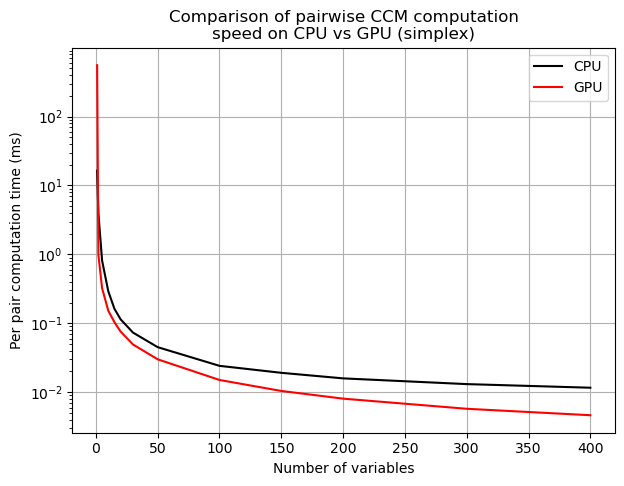

In [7]:
plt.figure(figsize=(7,5))
plt.title("Comparison of pairwise CCM computation\nspeed on CPU vs GPU (simplex)")
plt.plot(timeseries_counts, results_cpu, color="black", label="CPU")
plt.plot(timeseries_counts, results_cuda, color="red", label="GPU")
plt.yscale("log")
plt.xlabel("Number of variables")
plt.ylabel("Per pair computation time (ms)")
plt.legend()
plt.grid()

In [10]:
timeseries_counts = [1, 2, 5, 10, 15, 20]

In [11]:

results_cpu = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="smap")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 33.101320ms, Time per pair = 33.101320ms
N_sys=2: Avg time = 58.936199ms, Time per pair = 14.734050ms
N_sys=5: Avg time = 264.579932ms, Time per pair = 10.583197ms
N_sys=10: Avg time = 966.267109ms, Time per pair = 9.662671ms
N_sys=15: Avg time = 2143.545310ms, Time per pair = 9.526868ms
N_sys=20: Avg time = 3941.814899ms, Time per pair = 9.854537ms


In [ ]:
plt.figure(figsize=(7,5))
plt.title("Comparison of pairwise CCM computation\nspeed on CPU vs GPU (SMap)")
plt.plot(timeseries_counts, results_cpu, color="black", label="CPU")
plt.plot(timeseries_counts, results_cuda, color="red", label="GPU")
plt.yscale("log")
plt.xlabel("Number of variables")
plt.ylabel("Per pair computation time (ms)")
plt.legend()
plt.grid()

In [13]:
torch.cuda.get_device_name()

'NVIDIA RTX 3500 Ada Generation Laptop GPU'